# Shooting Method

Boundary-value problems are also ordinary differential equations—the difference is that our two constraints are at boundaries of the domain, rather than both being at the starting point.

For example, consider the ODE
\begin{equation}
y^{\prime\prime} + xy^{\prime} - xy = 2x
\end{equation}
with the boundary conditions $y(0)=1$ and $y(2)=8$.

The numerical methods we have already discussed (e.g., Forward Euler, Runge-Kutta) require values of $y$ and $y^{\prime}$ at the starting point, $x=0$. So we can't use these directly because we are missing $y^{\prime}(0)$. 

But, what if we could *guess* a value for the missing initial condition, then integrate towards the second boundary condition using one of our familiar numerical methods, and then adjust our guess if necessary and repeat? This concept is the **shooting method**.

The shooting method algorithm is:

1. Guess a value of the missing initial condition; in this case, that is $y'(0)$.
2. Integrate the ODE like an initial-value problem, using our existing numerical methods, to get the given boundary condition(s); in this case, that is $y(L)$.
3. Assuming your trial solution for $y(L)$ does not match the given boundary condition, adjust your guess for $y'(0)$ and repeat.

Now, this algorithm will not work particularly well if all your guesses are random/uninformed. Fortunately, we can use linear interpolation to inform a third guess based on two initial attempts:
\begin{align}
\text{guess 3} &= \text{guess 2} + m \left( \text{target} - \text{solution 2} \right) \\
m &= \frac{\text{guess 1} - \text{guess 2}}{\text{solution 1} - \text{solution 2}}
\end{align}
where "target" is the target boundary condition—in this case, $y(L)$.

## Example: linear ODE

Let's try solving the given ODE using the shooting method:
\begin{equation}
y^{\prime\prime} + xy^{\prime} - xy = 2x
\end{equation}
with the boundary conditions $y(0)=1$ and $y(2)=8$.

First, we need to convert this 2nd-order ODE into a system of two 1st-order ODEs, where we can define $u = y'$:
\begin{align}
y' &= u \\
u' &= 2x + xy - xu
\end{align}

In [1]:
%%file shooting_rhs.m
function dydx = shooting_rhs(x, y)

dydx = zeros(2,1);
dydx(1) = y(2);
dydx(2) = 2*x - x*y(2) + x*y(1);

Created file '/Users/niemeyek/projects/ME373-book/content/bvps/shooting_rhs.m'.


Solution 1:  6.00
Solution 2: 11.96
Guess 3:     2.01
Solution 3:  8.00
Target:      8.00


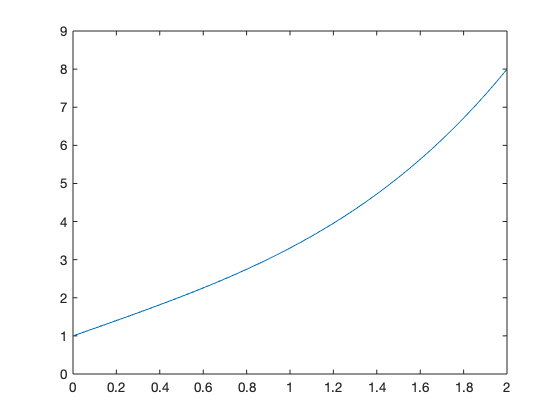

In [13]:
clear all; clc

% target boundary condition
target = 8;

% Pick a guess for y'(0) of 1
guess1 = 1;
[X, Y] = ode45('shooting_rhs', [0 2], [1 guess1]);
solution1= Y(end,1);
fprintf('Solution 1: %5.2f\n', solution1);

% Pick a second guess for y'(0) of 4
guess2 = 4;
[X, Y] = ode45('shooting_rhs', [0 2], [1 guess2]);
solution2 = Y(end,1);
fprintf('Solution 2: %5.2f\n', solution2);

% now use linear interpolation to find a new guess
m = (guess1 - guess2)/(solution1 - solution2);
guess3 = guess2 + m*(target-solution2);
fprintf('Guess 3:    %5.2f\n', guess3);

[X, Y] = ode45('shooting_rhs', [0 2], [1 guess3]);
solution3 = Y(end,1);
fprintf('Solution 3: %5.2f\n', solution3);
fprintf('Target:     %5.2f\n', target);

plot(X, Y(:,1)); axis([0 2 0 9])

As you can see, using linear interpolation, we are able to find the correct guess for the missing initial condition $y'(0)$ with in just three steps. This works so well because this is a *linear* ODE. If we had a nonlinear ODE, it would take more tries, as we'll see shortly.

## Example: nonlinear ODE

We can use the shooting method to solve a famous fluids problem: the [Blasius boundary layer](https://en.wikipedia.org/wiki/Blasius_boundary_layer).

<figure>
  <center>
  <img src="../images/boundary-layer.png" alt="Laminar boundary layer, from https://commons.wikimedia.org/wiki/File:Laminar_boundary_layer_scheme.svg" style="width: 400px;"/>
  <figcaption>Figure: Laminar boundary layer, taken from <a href="https://commons.wikimedia.org/wiki/File:Laminar_boundary_layer_scheme.svg">https://commons.wikimedia.org/wiki/File:Laminar_boundary_layer_scheme.svg</a></figcaption>
  </center>
</figure>

To get to a solveable ODE, we start with the conservation of momentum equation (i.e., Navier–Stokes equation) in the $x$-direction:
\begin{equation}
u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} = \nu \frac{\partial^2 u}{\partial y^2}
\end{equation}
and the conservation of mass equation:
\begin{equation}
\frac{\partial u}{\partial x} + \frac{\partial v}{\partial y} = 0 \;,
\end{equation}
where $u$ is the velocity component in the $x$-direction, $v$ is the velocity component in the $y$-direction, and $\nu$ is the fluid's kinematic viscosity. The boundary conditions are that $u = v = 0$ at $y=0$, and that $u = U_{\infty}$ as $y \rightarrow \infty$, where $U_{\infty}$ is the free-stream velocity.

Blasius solved this problem by converting the PDE into an ODE, by recognizing that the boundary layer thickness is given by $\delta(x) \sim \sqrt{\frac{x \nu}{U_{\infty}}}$, and then nondimensionalizing the position coordinates using a similarity variable
\begin{equation}
\eta = y \sqrt{\frac{U_{\infty}}{2 \nu x}}
\end{equation}